In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('../train_split_fluor.csv')
data_df

,Unnamed: 0,Tag,Chromophore,Solvent,Absorption max (nm),Emission max (nm),Lifetime (ns),Quantum yield,log(e/mol-1 dm3 cm-1),abs FWHM (cm-1),emi FWHM (cm-1),abs FWHM (nm),emi FWHM (nm),Molecular weight (g mol-1),Reference,Stokes shift
0,0,1,N#Cc1cc2ccc(O)cc2oc1=O,O,355.0,410.0,2.804262,NaN,NaN,NaN,NaN,NaN,NaN,187.15370,DOI: 10.1021/acs.jpcb.5b09905,55.0
1,1,2,N#Cc1cc2ccc([O-])cc2oc1=O,O,408.0,450.0,3.961965,NaN,NaN,NaN,NaN,NaN,43.0,186.14576,DOI: 10.1021/acs.jpcb.5b09905,42.0
2,2,3,CCCCCCCCCCCC#CC#CCCCCCCCCCN1C(=O)c2ccc3c4ccc5c...,ClC(Cl)Cl,526.0,535.0,3.602954,NaN,NaN,NaN,NaN,NaN,NaN,1061.54348,https://doi.org/10.1002/smll.201901342,9.0
3,4,5,[O-]c1c(-c2nc3ccccc3s2)cc2ccc3cccc4ccc1c2c34,CS(C)=O,524.0,555.0,4.700000,NaN,NaN,NaN,NaN,58.0,50.0,350.42028,https://doi.org/10.1016/j.snb.2018.10.043,31.0
4,5,6,CCN(CC)c1ccc2c(C)cc(=O)oc2c1,C1CCCCC1,350.0,395.0,2.800000,NaN,NaN,NaN,NaN,NaN,NaN,231.29398,DOI: 10.1021/j100248a024,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18381,20228,20229,N#Cc1c(N2CCCCC2)cc(-c2cccc3ccccc23)c2c1Cc1cccc...,C1CCOC1,358.0,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400.52356,DOI: 10.1021/ol9000679,93.0
18382,20230,20231,N#Cc1c(N2CCCCC2)cc(-c2ccc3ccc4cccc5ccc2c3c45)c...,C1CCOC1,344.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,474.60544,DOI: 10.1021/ol9000679,137.0
18383,20231,20232,N#Cc1c(N2CCCC2)cc(-c2ccccc2)c2c1C(=O)c1ccccc1-2,C1CCOC1,358.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.41992,DOI: 10.1021/ol9000679,NaN
18384,20233,20234,N#Cc1c(N2CCCCC2)cc(-c2cccc3ccccc23)c2c1C(=O)c1...,C1CCOC1,344.0,460.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,414.50668,DOI: 10.1021/ol9000679,116.0


In [3]:
data_df.shape

(18386, 16)

In [6]:
data_chromophore = data_df['Chromophore'].to_numpy()
data_solvent = data_df['Solvent'].to_numpy()

print(len(data_chromophore), len(data_solvent))
print(len(np.unique(data_chromophore)), len(np.unique(data_solvent)))

18386 18386
6469 1336


In [7]:
data_solvent

array(['O', 'O', 'ClC(Cl)Cl', ..., 'C1CCOC1', 'C1CCOC1', 'C1CCOC1'],
      dtype=object)

In [8]:
data_solvent_unique = np.unique(data_solvent)
data_solvent_unique

array(['BrC(Br)Br', 'BrCBr', 'BrCCBr', ..., 'c1csc(-c2ccc(-c3cccs3)s2)c1',
       'c1csc(-c2cccs2)c1', 'gas'], dtype=object)

In [9]:
'gas' in data_solvent_unique

True

In [10]:
'solid' in data_solvent_unique

False

In [11]:
gas_number = 0
gas_chromophore = []
for i in range(len(data_solvent)):
    if 'gas' == data_solvent[i]:
        gas_number += 1
        gas_chromophore.append(data_chromophore[i])
gas_chromophore = np.array(gas_chromophore)

In [12]:
print(gas_number, gas_number/len(data_solvent)*100)

18 0.09790057652561732


In [13]:
gas_chromophore

array(['CN(C)c1cc(C#N)c(N(C)C)c(C#N)c1',
       '[O-]c1c(-c2ccccc2)cc(-[n+]2c(-c3ccccc3)cc(-c3ccccc3)cc2-c2ccccc2)cc1-c1ccccc1',
       'C', 'CC', 'CCC', 'CCCC', 'CCCCC', 'CCCCCC', 'CCCCCCC', 'CCCCCCCC',
       'ClCl', 'BrBr', 'ClBr', 'C#C', 'COC', 'CS', 'CCSCC', 'CCOC(C)=O'],
      dtype='<U77')

In [26]:
data_abs_FWHM = data_df['log(e/mol-1 dm3 cm-1)']

data_abs_FWHM_nonan = data_abs_FWHM.dropna()

print(len(data_abs_FWHM), len(data_abs_FWHM_nonan))

18386 7251


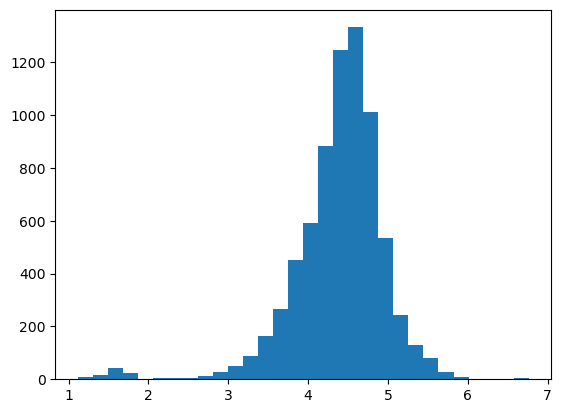

In [29]:
plt.hist(data_abs_FWHM, bins=30)
plt.show()

In [23]:
len(data_abs_FWHM_2), len(data_qy_2)

(18386, 18386)

In [25]:
data_abs_FWHM_2 = data_abs_FWHM.to_numpy()
data_qy_2 = data_qy.to_numpy()
mask = ~np.isnan(data_abs_FWHM_2) & ~np.isnan(data_qy_2)
np.corrcoef(data_abs_FWHM_2[mask], data_qy_2[mask])

array([[1.        , 0.17627524],
       [0.17627524, 1.        ]])

In [14]:
data_s_shift = data_df['Stokes shift']

data_s_shift_nonan = data_s_shift.dropna()

print(len(data_s_shift), len(data_s_shift_nonan))

18386 14480


In [15]:
treshold = -0

data_s_shift_bad = data_s_shift[data_s_shift < treshold]
data_s_shift_clean = data_s_shift[data_s_shift >= treshold]

data_s_shift_bad

1029      -2.000000
1032      -3.000000
1037      -1.000000
2299      -1.000000
2310      -2.000000
2311      -6.000000
2313      -5.000000
2318      -2.000000
3315      -7.000000
4104     -25.000000
4523     -14.000000
5138     -26.000000
5294     -23.542353
6458      -2.274027
6460      -1.013307
6461      -0.302612
8355      -4.000000
8365     -62.000000
8575     -28.000000
8578     -24.000000
8579     -27.000000
8604     -12.000000
10641    -48.000000
11988    -97.000000
11989    -98.000000
12155     -2.000000
12162    -12.000000
12183     -6.000000
12228    -10.727891
13043     -3.000000
17203   -255.000000
Name: Stokes shift, dtype: float64

In [16]:
print(len(data_s_shift_bad)/len(data_s_shift)*100, '%')

0.16860654846078538 %


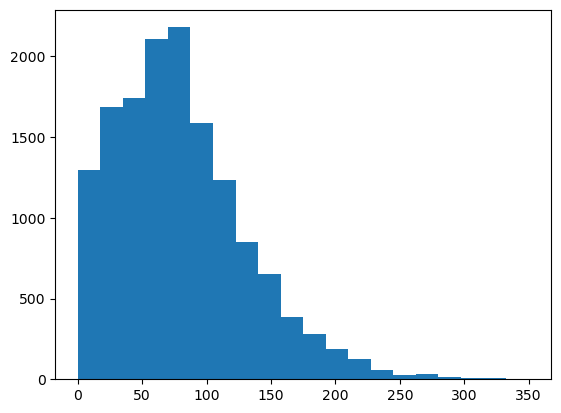

In [17]:
plt.hist(data_s_shift_clean, bins=20)
plt.show()

<Axes: >

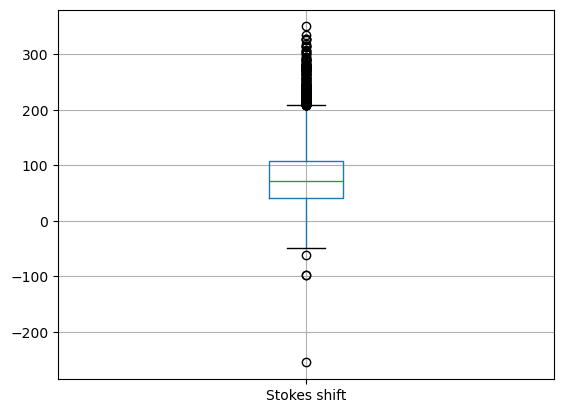

In [18]:
data_df.boxplot(column=['Stokes shift'])

In [19]:
data_absorption = data_df['Absorption max (nm)']

data_absorption_nonan = data_absorption.dropna()

print(len(data_absorption), len(data_absorption_nonan))

18386 15649


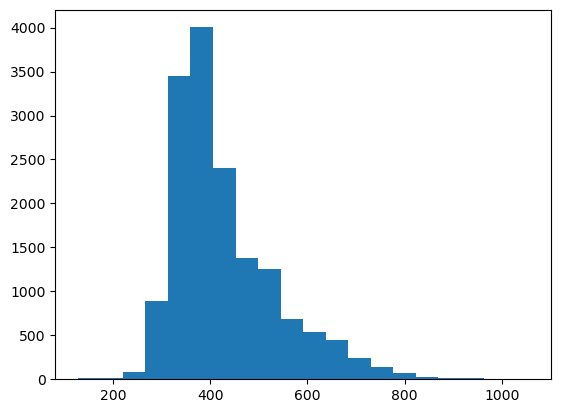

In [20]:
plt.hist(data_absorption, bins=20)
plt.show()

In [21]:
data_emission = data_df['Emission max (nm)']

data_emission_nonan = data_emission.dropna()

print(len(data_emission), len(data_emission_nonan))

18386 16467


In [19]:
data_qy = data_df['Quantum yield']

data_qy_clean = data_df['Quantum yield'].dropna()

print(len(data_qy), len(data_qy_clean))

18386 12538


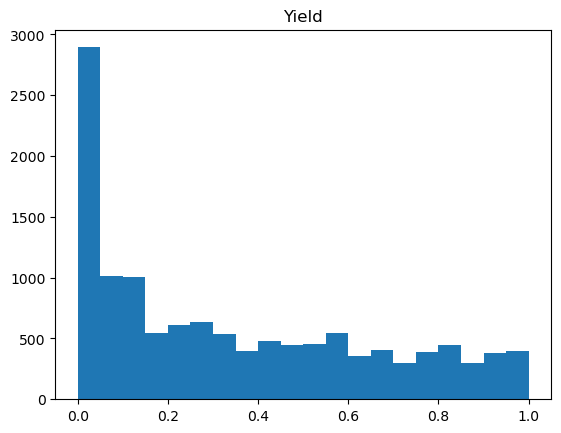

In [23]:
plt.hist(data_qy, bins=20)
plt.title('Yield')
plt.show()

In [24]:
data_1 = data_df[['Chromophore', 'Solvent', 'Absorption max (nm)', 'Emission max (nm)', 'Stokes shift']].dropna(axis=0)
data_1.shape

(14480, 5)

In [25]:
data_2 = data_df[['Chromophore', 'Solvent', 'Absorption max (nm)', 'Emission max (nm)']].dropna(axis=0)
data_2.shape

(14480, 4)

In [26]:
data_3 = data_df[
    ['Chromophore',
     'Solvent',
     'Absorption max (nm)',
     'Emission max (nm)',
     'Stokes shift',
     'Quantum yield'
     ]].dropna(axis=0)
data_3.shape

(10856, 6)

In [27]:
data_4 = data_df[
    ['Chromophore',
     'Solvent',
     'Absorption max (nm)',
     'Emission max (nm)',
     'Stokes shift',
     'Quantum yield'
     ]].dropna(subset=['Absorption max (nm)', 'Emission max (nm)', 'Stokes shift', 'Quantum yield'], how='all')
data_4.shape

(18141, 6)

In [28]:
data_absorption_freq = 3 * 10**(8+9-15) / data_absorption

In [32]:
data_absorption_freq_clean = data_absorption_freq[data_absorption_freq < 1.5]

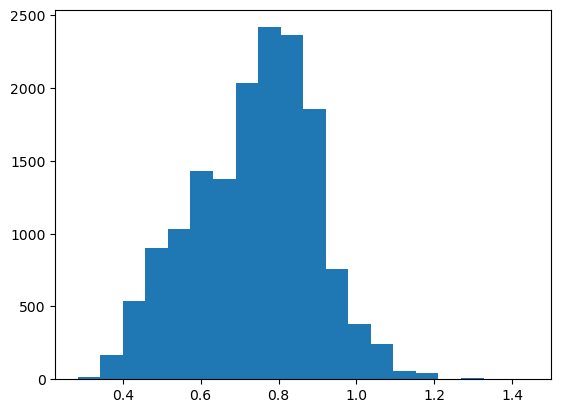

In [34]:
plt.hist(data_absorption_freq_clean, bins=20)
plt.show()

In [35]:
data_emission_freq = 3 * 10**(8+9-15) / data_emission

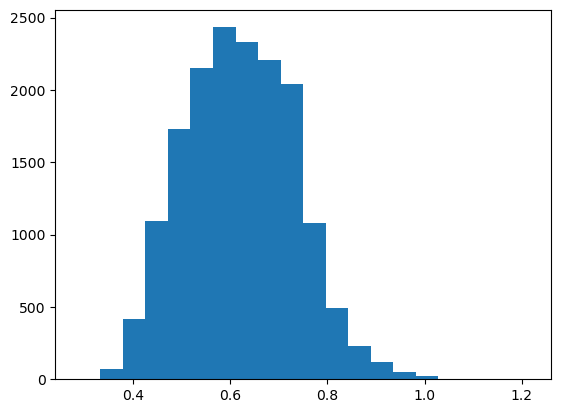

In [36]:
plt.hist(data_emission_freq, bins=20)
plt.show()

In [50]:
def make_log_qyield(df):
    df_tmp = df.copy()
    df_tmp.loc[df_tmp == 0.0] = 1e-5
    # df_tmp.loc[:, 'log qyield'] = np.log(df_tmp['Quantum yield'])
    return np.log(df_tmp)

def inv_sigmoid(df, eps=1e-5):
    df_tmp = df.copy()
    df_tmp.loc[df_tmp == 0.0] = eps
    df_tmp.loc[df_tmp == 1.0] = 1 - eps
    # df_tmp.loc[:, 'log qyield'] = np.log(df_tmp['Quantum yield'])
    return np.log(df_tmp) - np.log(1 - df_tmp)

In [51]:
data_log_q_yield = make_log_qyield(data_qy)

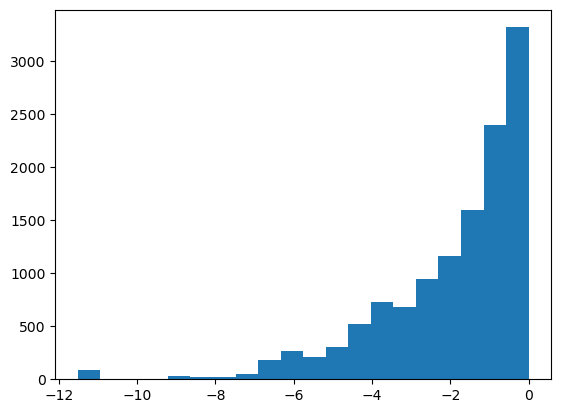

In [52]:
plt.hist(data_log_q_yield, bins=20)
plt.show()

In [1]:
data_inv_sig_q_yield = inv_sigmoid(data_qy)

NameError: name 'inv_sigmoid' is not defined

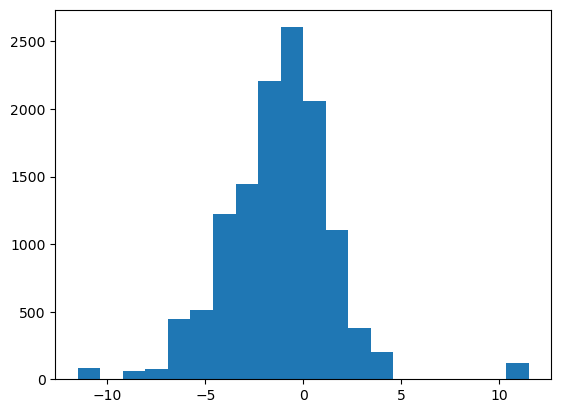

In [54]:
plt.hist(data_inv_sig_q_yield, bins=20)
plt.show()